In [1]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import importlib
import sys
sys.path.insert(0, '../utils')
import data_utils
import visualization
import evaluation

importlib.reload(visualization)
importlib.reload(evaluation)

sys.path.insert(0, '../models')
import log_reg_word_embeddings_all

<module 'visualization' from '../utils/visualization.py'>

<module 'evaluation' from '../utils/evaluation.py'>

In [4]:
NAME = 'LogRegAll'

In [5]:
df_train = data_utils.load_data_set('../data/train/train.csv')
df_train_x = df_train[['head.word', 'tail.word', 'sentence']]
df_train_y = df_train['relation']

In [6]:
model = log_reg_word_embeddings_all.LogRegWordEmbeddingsAll()

In [7]:
model.fit(df_train_x, df_train_y)

Tokenizing head.words, tail.words and sentences...
    head.word         tail.word  \
0  [syracuse]  [onondaga, lake]   
1  [syracuse]  [onondaga, lake]   
2  [syracuse]  [onondaga, lake]   
3    [turkey]           [adana]   
4    [turkey]           [adana]   

                                            sentence  
0  [she, also, oversaw, refinancing, state, super...  
1  [more, 2, 5, million, cubic, yards, contaminat...  
2  [the, onondaga, nation, 1, 500, members, feder...  
3  [he, born, istanbul, raised, eastern, city, ad...  
4  [by, end, recent, tour, rollins, met, soldiers...  
Averaging word embeddings...
                                           head.word  \
0  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
1  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
2  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
3  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   
4  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   

                                          

In [8]:
model.predict_proba(df_train_x.head())

Tokenizing head.words, tail.words and sentences...
    head.word         tail.word  \
0  [syracuse]  [onondaga, lake]   
1  [syracuse]  [onondaga, lake]   
2  [syracuse]  [onondaga, lake]   
3    [turkey]           [adana]   
4    [turkey]           [adana]   

                                            sentence  
0  [she, also, oversaw, refinancing, state, super...  
1  [more, 2, 5, million, cubic, yards, contaminat...  
2  [the, onondaga, nation, 1, 500, members, feder...  
3  [he, born, istanbul, raised, eastern, city, ad...  
4  [by, end, recent, tour, rollins, met, soldiers...  
Averaging word embeddings...
                                           head.word  \
0  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
1  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
2  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
3  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   
4  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   

                                          

array([[4.36943711e-07, 5.02265538e-07, 5.83609555e-08, 1.11311241e-05,
        1.23920246e-07, 8.65307185e-07, 5.35241956e-06, 5.02621601e-06,
        8.28540172e-06, 1.84454267e-07, 6.88241780e-05, 5.90078716e-05,
        5.51657922e-01, 2.00000448e-05, 8.58864414e-05, 2.77156981e-04,
        1.00377442e-04, 2.54142236e-05, 1.21148146e-05, 9.42478338e-06,
        1.10735228e-06, 5.06181807e-06, 1.21017827e-06, 4.76421594e-04,
        4.75248063e-05, 1.06969008e-06, 1.63550646e-05, 2.61969974e-03,
        2.33546678e-07, 4.44483221e-01],
       [3.98671280e-07, 3.44849576e-07, 5.59761815e-08, 1.09185894e-05,
        1.13056133e-07, 7.85336352e-07, 4.64373537e-06, 4.35977260e-06,
        7.36209795e-06, 1.67499510e-07, 6.11495053e-05, 5.14462784e-05,
        4.87361559e-01, 1.92724156e-05, 8.09598572e-05, 2.40903776e-04,
        7.24115534e-05, 2.19507385e-05, 7.93301062e-06, 7.87222105e-06,
        1.04698900e-06, 4.11252628e-06, 2.47674113e-06, 2.00904884e-04,
        3.10624630e-05,

In [9]:
import pickle

save_dir = '../trained_models/{}.pkl'.format(NAME)
with open(save_dir, 'wb') as save_file:
    pickle.dump(model.model, save_file)

In [10]:
with open(save_dir, 'rb') as saved_file:
    loaded_model = pickle.load(saved_file)

In [11]:
loaded_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=6, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
df_test = data_utils.load_data_set('../data/test/test.csv')
df_test_x = df_test[['head.word', 'tail.word', 'sentence']]
df_test_y = df_test['relation']

In [13]:
predictions = model.predict(df_test_x)

Tokenizing head.words, tail.words and sentences...
              head.word            tail.word  \
0  [arthur, schnitzler]             [vienna]   
1      [roberto, calvi]              [italy]   
2      [johnny, rivers]          [louisiana]   
3         [philippines]  [san, carlos, city]   
4       [alex, salmond]           [scotland]   

                                            sentence  
0  [the, little, comedy, mannered, operetta, base...  
1  [a, court, rome, acquitted, five, people, accu...  
2  [there, also, performers, born, louisiana, inc...  
3  [when, julian, resuello, mayor, san, carlos, c...  
4  [a3, concern, raised, libya, deal, alex, salmo...  
Averaging word embeddings...
                                           head.word  \
0  [0.14344, 0.140793, 0.024160499999999994, 0.19...   
1  [0.126935, 0.115716, -0.051785, 0.20748, 0.177...   
2  [0.08202799999999999, 0.08247650000000001, -0....   
3  [0.25001, -0.049111, -0.12445, 0.044313, 0.221...   
4  [0.173818, 0.10580

In [14]:
pred_probas = model.predict_proba(df_test_x)

Tokenizing head.words, tail.words and sentences...
              head.word            tail.word  \
0  [arthur, schnitzler]             [vienna]   
1      [roberto, calvi]              [italy]   
2      [johnny, rivers]          [louisiana]   
3         [philippines]  [san, carlos, city]   
4       [alex, salmond]           [scotland]   

                                            sentence  
0  [the, little, comedy, mannered, operetta, base...  
1  [a, court, rome, acquitted, five, people, accu...  
2  [there, also, performers, born, louisiana, inc...  
3  [when, julian, resuello, mayor, san, carlos, c...  
4  [a3, concern, raised, libya, deal, alex, salmo...  
Averaging word embeddings...
                                           head.word  \
0  [0.14344, 0.140793, 0.024160499999999994, 0.19...   
1  [0.126935, 0.115716, -0.051785, 0.20748, 0.177...   
2  [0.08202799999999999, 0.08247650000000001, -0....   
3  [0.25001, -0.049111, -0.12445, 0.044313, 0.221...   
4  [0.173818, 0.10580

In [15]:
from collections import Counter
Counter(predictions)

predicted_labels = predictions
gold_labels = df_test_y

Counter(gold_labels)

Counter({'NA': 159540,
         '/people/person/nationality': 1799,
         '/location/location/contains': 6933,
         '/people/person/place_lived': 1145,
         '/business/person/company': 668,
         '/location/country/administrative_divisions': 252,
         '/location/administrative_division/country': 867,
         '/people/deceased_person/place_of_death': 94,
         '/people/person/place_of_birth': 170,
         '/location/country/capital': 663,
         '/business/company/founders': 149,
         '/location/neighborhood/neighborhood_of': 134,
         '/business/company/place_founded': 11,
         '/sports/sports_team/location': 17})

Counter({'/people/person/place_of_birth': 162,
         '/people/person/nationality': 723,
         '/people/person/place_lived': 450,
         '/location/location/contains': 2793,
         '/sports/sports_team/location': 10,
         '/business/person/company': 302,
         '/location/country/capital': 553,
         '/business/company/founders': 95,
         '/film/film/featured_film_locations': 2,
         '/location/administrative_division/country': 424,
         '/location/us_county/county_seat': 23,
         '/people/deceased_person/place_of_death': 68,
         '/business/company/place_founded': 20,
         '/location/neighborhood/neighborhood_of': 68,
         '/people/person/children': 30,
         '/film/film_location/featured_in_films': 2,
         '/people/ethnicity/geographic_distribution': 136,
         '/location/country/administrative_divisions': 424,
         '/location/us_state/capital': 39,
         '/business/company_advisor/companies_advised': 8,
         '/time/e

In [16]:
with open('../data/classes.json') as f:
    classes_json = json.load(f)
classes = np.asarray(list(classes_json.keys()))

<module 'evaluation' from '../utils/evaluation.py'>

Precision points array saved at: ../baselines_pr/LogRegAll/precision.npy
Recall points array saved at: ../baselines_pr/LogRegAll/recall.npy
Precision-Recall plot saved at: ../plots/pr_curve_LogRegAll.png


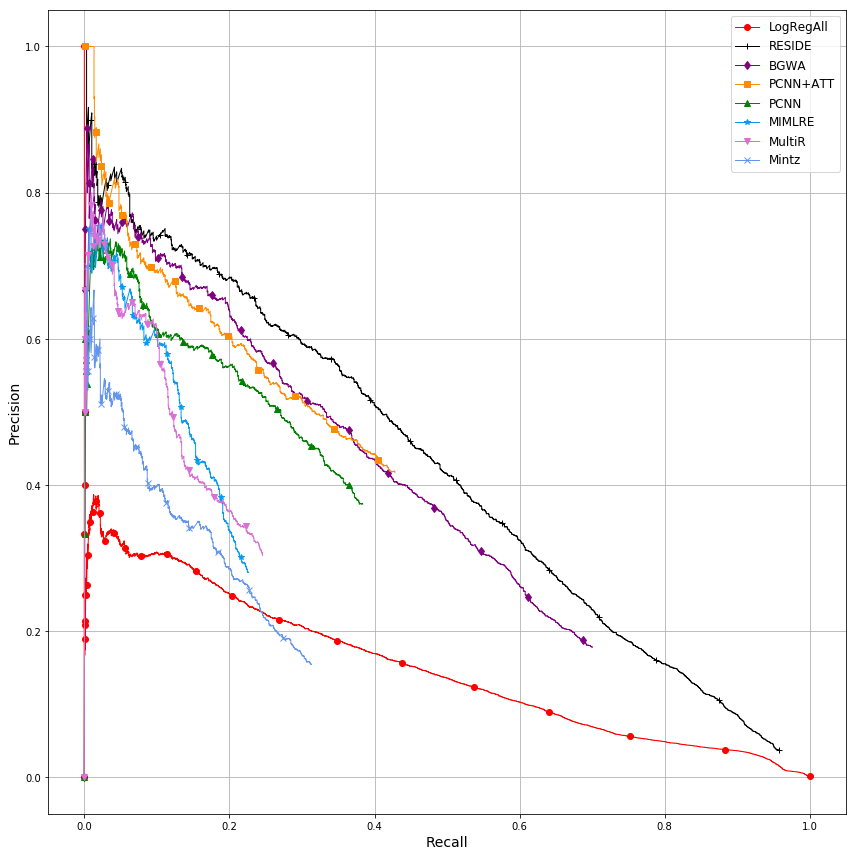

Normalized confusion matrix
Confusion Matrix plot saved at: ../plots/cnf_matrix_LogRegAll.png


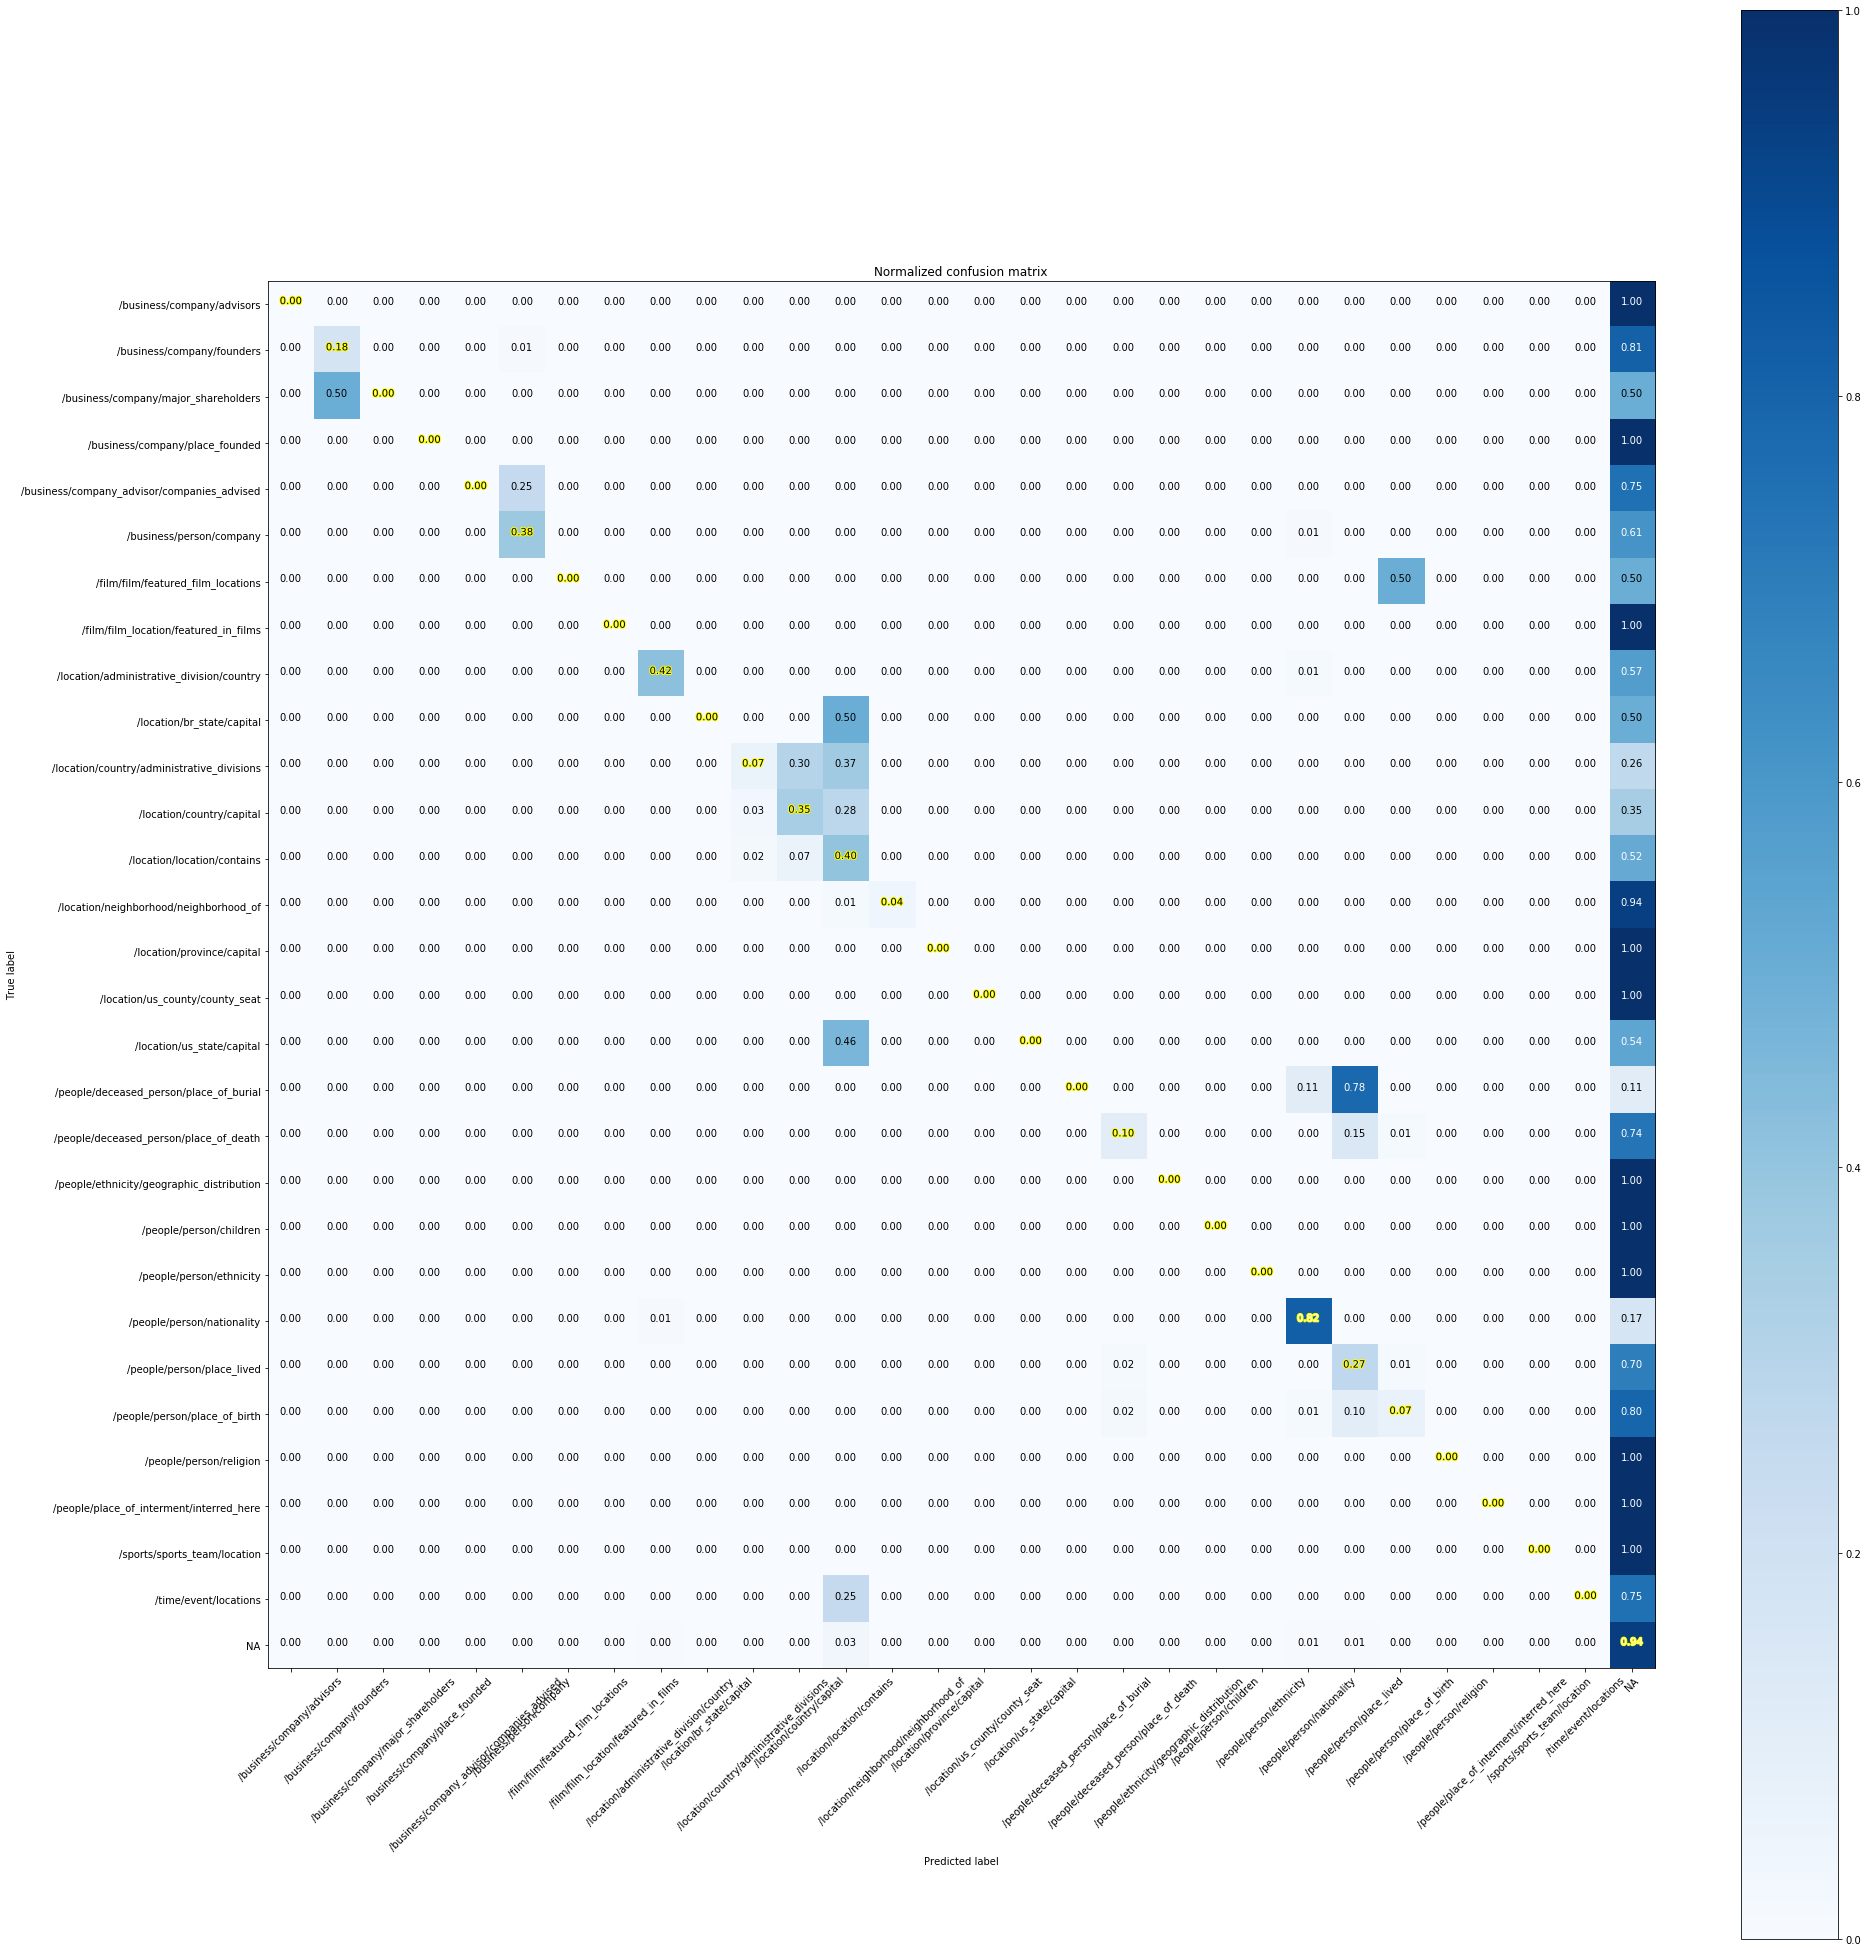

Saved results JSON at: ../results/LogRegAll.json


{'accuracy': 0.9201412648890641,
 'precision': 0.18439001705147698,
 'recall': 0.36940993788762516,
 'f1': 0.24599317103089552,
 'ap_area': 0.14937344714292,
 'p@100': 0.3,
 'p@200': 0.365,
 'p@300': 0.37}

In [19]:
importlib.reload(evaluation)

evaluation.evaluate(
    y_actual=gold_labels.values.reshape(-1, 1),
    y_pred=predicted_labels,
    y_pred_probs=pred_probas,
    classes=classes,
    name=NAME
)